Saving WhatsApp Image 2025-12-02 at 8.57.43 AM.jpeg to WhatsApp Image 2025-12-02 at 8.57.43 AM (3).jpeg
Correct Objects Detected: 8


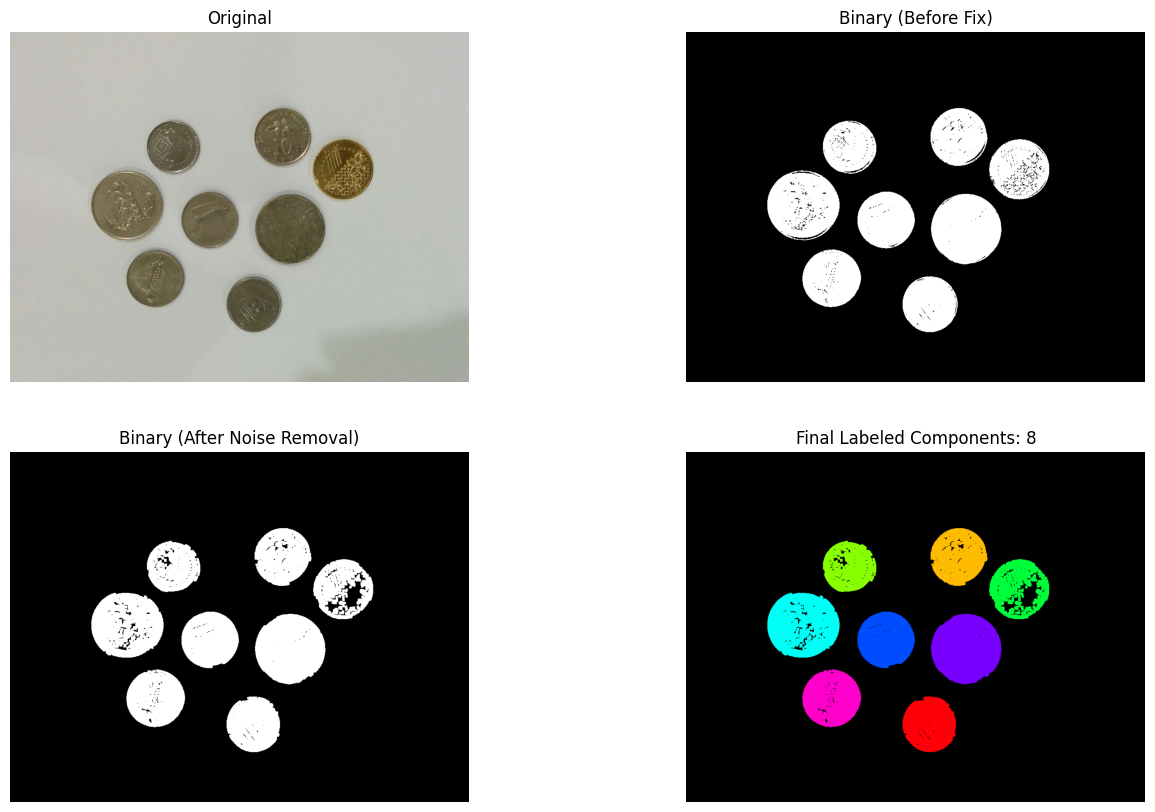

In [ ]:
!pip install opencv-python matplotlib numpy

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary = cv2.bitwise_not(binary)   # invert for white objects

# -----------------------------------------
# 🔥 FIX 1: REMOVE NOISE USING MORPHOLOGY
# -----------------------------------------
kernel = np.ones((5, 5), np.uint8)
binary_clean = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# -----------------------------------------
# 🔥 FIX 2: REMOVE SMALL OBJECTS BY AREA
# -----------------------------------------
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_clean)

# Create empty mask for valid components
filtered = np.zeros_like(binary_clean)

min_area = 5000   # adjust: small blobs get removed

for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    if area > min_area:
        filtered[labels == i] = 255

# Final connected components after filtering
final_labels_count, final_labels, final_stats, _ = cv2.connectedComponentsWithStats(filtered)

print("Correct Objects Detected:", final_labels_count - 1)

# -----------------------------------------
# Coloring final components
# -----------------------------------------
label_hue = np.uint8(179 * final_labels / np.max(final_labels))
blank_ch = 255 * np.ones_like(label_hue)
colored_img = cv2.merge([label_hue, blank_ch, blank_ch])
colored_img = cv2.cvtColor(colored_img, cv2.COLOR_HSV2RGB)
colored_img[label_hue == 0] = 0

# -----------------------------------------
# Display result
# -----------------------------------------
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(img_rgb); plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Binary (Before Fix)")
plt.imshow(binary, cmap='gray'); plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Binary (After Noise Removal)")
plt.imshow(filtered, cmap='gray'); plt.axis("off")

plt.subplot(2, 2, 4)
plt.title(f"Final Labeled Components: {final_labels_count - 1}")
plt.imshow(colored_img); plt.axis("off")

plt.show()
